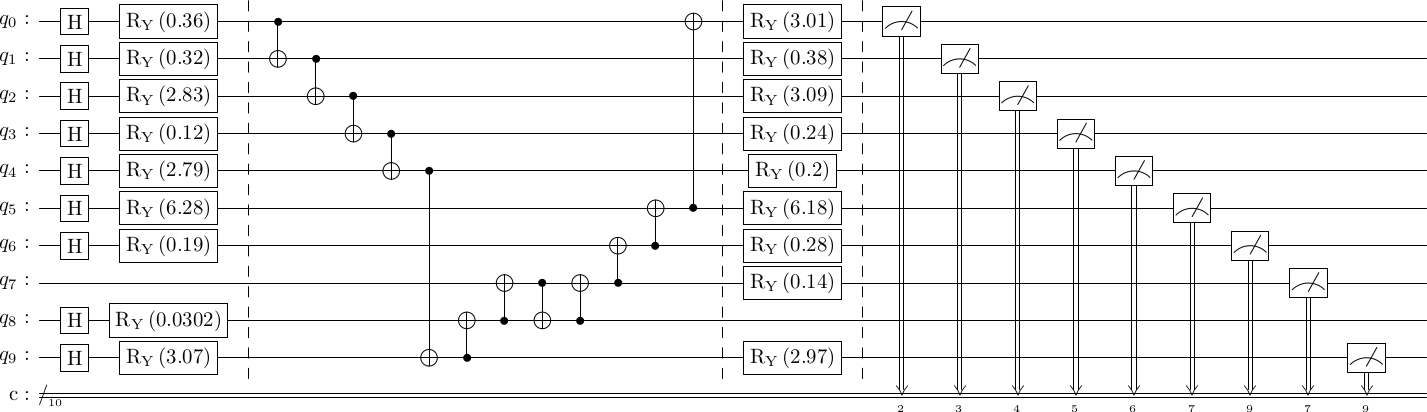

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram 
import numpy as np

shots = 1024

qc = QuantumCircuit()

q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')

qc.add_register(q)
qc.add_register(c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.h(q[5])
qc.h(q[6])
qc.h(q[8])
qc.h(q[9])
qc.ry(0.36, q[0])
qc.ry(0.32, q[1])
qc.ry(2.83, q[2])
qc.ry(0.12, q[3])
qc.ry(2.79, q[4])
qc.ry(6.28, q[5])
qc.ry(0.19, q[6])
qc.ry(0.0302, q[8])
qc.ry(3.07, q[9])
qc.barrier()
qc.cx(q[0], q[1])
qc.cx(q[1], q[2])
qc.cx(q[2], q[3])
qc.cx(q[3], q[4])
qc.cx(q[4], q[9])
qc.cx(q[9], q[8])
qc.cx(q[8], q[7])
qc.cx(q[7], q[8])
qc.cx(q[8], q[7])
qc.cx(q[7], q[6])
qc.cx(q[6], q[5])
qc.cx(q[5], q[0])
qc.barrier()
qc.ry(3.01, q[0])
qc.ry(0.38, q[1])
qc.ry(3.09, q[2])
qc.ry(0.24, q[3])
qc.ry(0.2, q[4])
qc.ry(6.18, q[5])
qc.ry(0.28, q[6])
qc.ry(0.14, q[7])
qc.ry(2.97, q[9])
qc.barrier()
qc.measure(q[0], c[2])
qc.measure(q[1], c[3])
qc.measure(q[2], c[4])
qc.measure(q[3], c[5])
qc.measure(q[4], c[6])
qc.measure(q[5], c[7])
qc.measure(q[6], c[9])
qc.measure(q[7], c[7])
qc.measure(q[9], c[9])

qc.draw(output='latex')

In [2]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=shots)
job_result = job.result()
print(job_result.get_counts(qc))

{'0001101000': 1, '0000011000': 1, '1011101100': 1, '1001011000': 2, '0011111000': 3, '0000010000': 3, '1001001100': 3, '1000110000': 5, '0000101000': 3, '1010100100': 3, '1001111000': 2, '1000101000': 4, '0010111100': 10, '1011100000': 5, '1001110000': 2, '1010010000': 4, '1001111100': 3, '1000010000': 5, '1000110100': 6, '0011101100': 3, '0011100100': 7, '1001100000': 4, '1011101000': 2, '1000001100': 1, '0001001000': 3, '0000000000': 8, '0000001100': 1, '0000001000': 1, '1001110100': 4, '0001110100': 2, '0011011000': 18, '1001010000': 7, '0001100000': 4, '0001100100': 6, '0001111100': 3, '0000000100': 13, '1000111000': 6, '1011100100': 11, '0010101100': 8, '0011110100': 5, '0000010100': 2, '1010111100': 3, '1001100100': 9, '0001001100': 4, '0010001100': 5, '1010101000': 1, '0010011100': 11, '0010000000': 16, '1000000100': 8, '0010001000': 4, '0011011100': 13, '0010010100': 8, '0011100000': 10, '0011001100': 5, '0000100000': 11, '1011010100': 9, '0001000000': 21, '1001001000': 2, '10

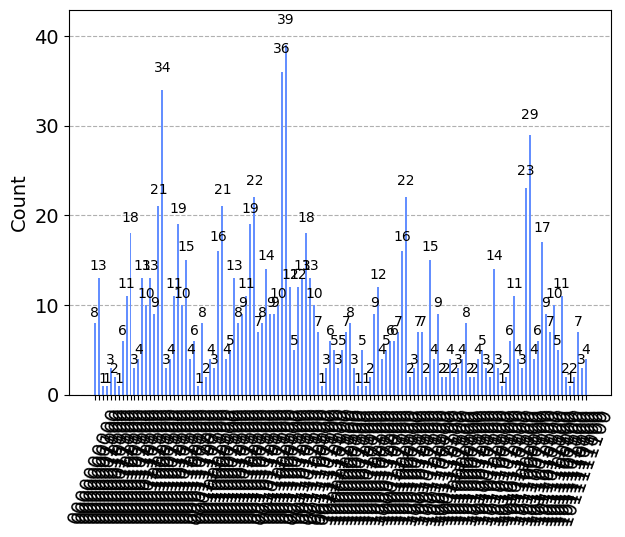

In [3]:
plot_histogram(job_result.get_counts(qc))